In [77]:
import numpy as np
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt

In [78]:
with open("../data/_processed/users_ratings_list.pkl", "rb") as f:
    dsets = pk.load(f)

In [79]:
for df in dsets:
    print(f'datset: {df}')
    dsets[df].head()

datset: user_profiles
datset: user_personalities
datset: user_reviews
datset: user_styles
datset: user_ageranges
datset: user_characteristics


# Generate plots

## travel styles


In [80]:
dsets['user_profiles']['travelStyle_split'] = dsets['user_profiles']['travelStyle'].apply(lambda x: x.strip().split(', '))

style_dic = {}
for wl in dsets['user_profiles']['travelStyle_split'].values:
  for k in wl:
    style_dic[k] = style_dic.get(k, 0) + 1


style_dic = dict(sorted(style_dic.items(), key = lambda x: x[1], reverse = True))

style_dic


{'Foodie': 2103,
 'Like a Local': 1666,
 'Urban Explorer': 1409,
 'Luxury Traveller': 1376,
 'Family Hoilday Maker': 1302,
 'Peace and Quiet Seeker': 1250,
 'Beach Goer': 1173,
 'History Buff': 1125,
 'Nature Lover': 1084,
 'Art and Architecture Lover': 959,
 'Thrifty Traveller': 740,
 'Shopping Fanatic': 647,
 '60+ Traveler': 575,
 'Thrill Seeker': 542,
 'Trendsetter': 374,
 'Nightlife Seeker': 302,
 'Eco-tourist': 241,
 'Vegetarian': 205,
 'Backpacker': 156}

In [81]:
ages = pd.DataFrame(dsets['user_profiles'].\
             groupby(['ageRange'])['ageRange'].\
             count()).rename(columns = {"ageRange": "count"}).reset_index()


In [82]:
range(ages.shape[0])

range(0, 6)

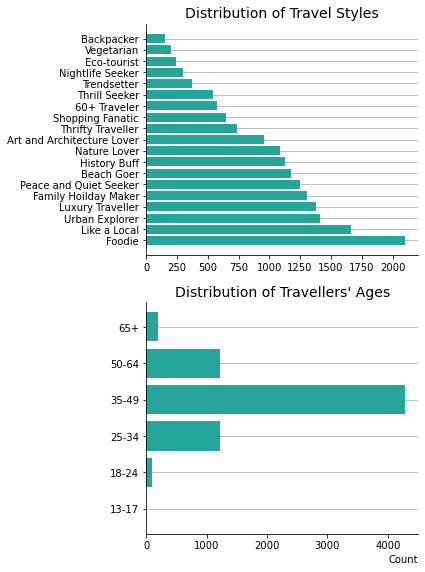

In [86]:
fig, ax = plt.subplots(2)

fig.set_figheight(20/2.54)
fig.set_figwidth(15/2.54)
# fig.tight_layout()
plt.subplots_adjust( left = 0.35, right = 0.99, top = 0.95, bottom = 0.05)


ax[0].barh(y = range(len(style_dic.values())), width = style_dic.values(), color = '#26A69A')

ax[0].grid(True)
ax[0].set_yticks(range(len(style_dic.values())))
ax[0].set_yticklabels(style_dic.keys(), rotation = 0)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(visible=False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title("Distribution of Travel Styles", fontsize = 14)





ax[1].barh(y = range(ages.shape[0]),
            width = ages['count'], color = '#26A69A')

ax[1].grid(True)
ax[1].set_yticks(range(ages.shape[0]))
ax[1].set_yticklabels(ages['ageRange'], rotation = 0)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(visible=False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title("Distribution of Travellers' Ages", fontsize = 14)


ax[1].set_xlabel("Count", fontsize = 10, loc = 'right')


plt.savefig(fname = "../static/assets/fig/travellers_style_age.png", dpi = 300, transparent = False, facecolor = "#FFFFFF", edgecolor = '#26A69A')

In [23]:
dsets['user_personalities']

,username,open,cons,extra,agree,neuro
0,007solotraveler,0.63272,0.55666,0.56360,0.58108,0.45881
1,0BKI0,0.64006,0.55189,0.56220,0.57943,0.46188
2,10179k79,0.66435,0.56099,0.56880,0.58187,0.45011
3,124_10,0.66003,0.57005,0.57221,0.59019,0.44860
4,12ReasonsWhy,0.65036,0.55429,0.56510,0.58271,0.45919
...,...,...,...,...,...,...
1093,Familyman54,0.65175,0.56338,0.56892,0.58493,0.45219
1094,Familyof4Scotland,0.63591,0.54569,0.55994,0.57607,0.46772
1095,Familytour4,0.65039,0.56019,0.56853,0.58691,0.45570
1096,FanMan10,0.65575,0.56977,0.57073,0.58714,0.44896


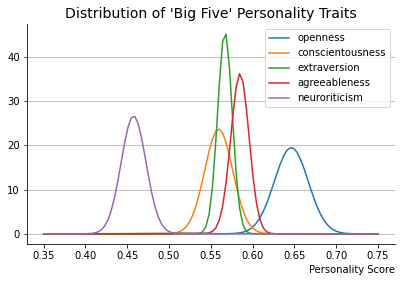

In [175]:
# # dsets['user_personalities']
from scipy.stats import gaussian_kde
# dens = []
# dens = gaussian_kde()

up = dsets['user_personalities'].iloc[:,1:]
up.columns.values


kdes = {}
for cl in up.columns.values:
    density = gaussian_kde(up.loc[:,cl])
    density.covariance_factor = lambda : 1.5
    density._compute_covariance()
    kdes[cl] = density


label_dic = dict(zip(up.columns.values, ['openness',	'conscientousness',	'extraversion',	'agreeableness',	'neuroriticism']))

fig, ax = plt.subplots(1)
fig.set_figheight(10/2.54)
fig.set_figwidth(15/2.54)
plt.subplots_adjust(right = 0.99, top = 0.9, bottom = 0.125)



x = np.linspace(0.35, 0.75, 100)

for k,v in kdes.items():
    
    y = v(x)
    ax.plot(x, y, label = label_dic[k])


ax.grid(True)
ax.set_axisbelow(True)
ax.xaxis.grid(visible=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Distribution of 'Big Five' Personality Traits", fontsize = 14)
ax.set_xlabel("Personality Score", fontsize = 10, loc = 'right')

ax.legend()


# plt.show()
plt.savefig(fname = "../static/assets/fig/travellers_personality.png", dpi = 300, transparent = False, facecolor = "#FFFFFF", edgecolor = '#26A69A')

In [91]:
city_ratings_by_user = dsets['user_reviews'] \
    .groupby(['username', 'taObjectCity']) \
        .agg(
            n = ('rating', len), 
            rating_mean = ('rating', np.mean), 
            rating_median = ('rating', np.median)
            )

In [104]:
n_slice = 10

In [94]:
city_ratings = dsets['user_reviews'] \
    .groupby(['taObjectCity']) \
        .agg(
            n = ('rating', len), 
            rating_mean = ('rating', np.mean), 
            rating_median = ('rating', np.median)
            )

In [111]:
city_most = city_ratings.sort_values(['n'], ascending=False).iloc[:n_slice,:2]

In [110]:
city_best = city_ratings[city_ratings['n'] > 30].sort_values(['rating_mean'], ascending=False).iloc[:n_slice,:2]

In [109]:
city_worst = city_ratings[city_ratings['n'] > 30].sort_values(['rating_mean'], ascending=True).iloc[:n_slice,:2]

In [112]:
rating_sets = dict(zip(["Most votes", "Best", "Worst"], [city_most, city_best, city_worst]))

In [117]:
rating_sets['Worst'].index.tolist()

['Alexandria',
 'Southampton',
 'Canberra',
 'Lancaster',
 'Brisbane',
 'Blackpool',
 'Springfield',
 'Hounslow',
 'Brussels',
 'Frankfurt']

0
1
2


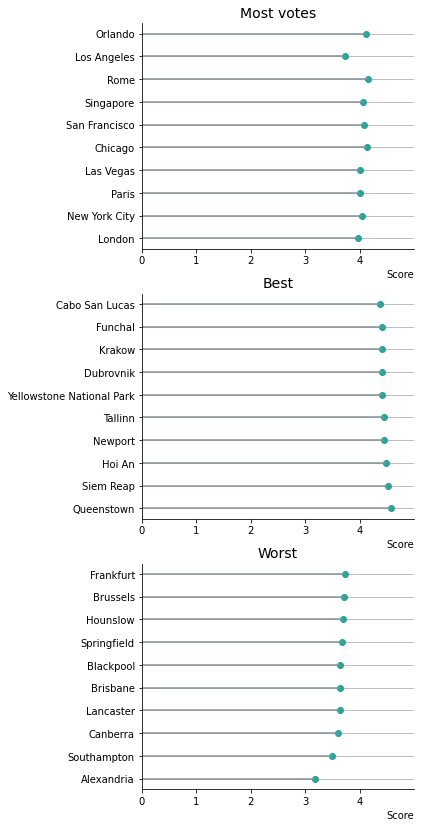

In [173]:
fig, ax = plt.subplots(3)

fig.set_figheight(30/2.54)
fig.set_figwidth(15/2.54)
# fig.tight_layout()
plt.subplots_adjust(left = 0.35, right = 0.99, top = 0.95, bottom = 0.05)


axiter = 0
for k,v in rating_sets.items():

    ax[axiter].hlines(range(v.shape[0]), 0, v['rating_mean'],  color = '#879393')
    ax[axiter].scatter(v['rating_mean'],range(v.shape[0]),  color = '#26A69A')

    

    ax[axiter].set_yticks(range(v.shape[0]))
    ax[axiter].set_yticklabels(v.index.tolist(), rotation = 0)
    ax[axiter].set_xlim(0,5)

    ax[axiter].set_xticks(range(0,5))
    ax[axiter].set_xticklabels(range(0,5))
    ax[axiter].grid(True)
    ax[axiter].set_axisbelow(True)
    ax[axiter].xaxis.grid(visible=False)

    ax[axiter].spines['top'].set_visible(False)
    ax[axiter].spines['right'].set_visible(False)
    ax[axiter].set_title(k, fontsize = 14)
    ax[axiter].set_xlabel("Score", fontsize = 10, loc = 'right')

    print(axiter)
    axiter += 1
    


plt.savefig(fname = "../static/assets/fig/city_ratings_panel.png", dpi = 300, transparent = False, facecolor = "#FFFFFF", edgecolor = '#26A69A')

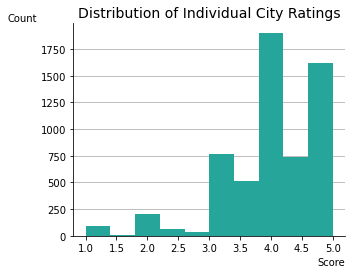

In [172]:


density = gaussian_kde(city_ratings['rating_mean'])
density.covariance_factor = lambda : 0.25
density._compute_covariance()



fig, ax = plt.subplots(1)
fig.set_figheight(10/2.54)
fig.set_figwidth(15/2.54)
plt.subplots_adjust(left = 0.35, right = 0.99, top = 0.9, bottom = 0.15)




# x = np.linspace(0, 7, 1000)


# ax.plot(x, density(x))


counts, bins = np.histogram(city_ratings['rating_mean'])
ax.stairs(counts, bins, fill = True, color = '#26A69A')


ax.grid(True)
ax.set_axisbelow(True)
ax.xaxis.grid(visible=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Distribution of Individual City Ratings", fontsize = 14)
ax.set_xlabel("Score", fontsize = 10, loc = 'right')
ax.set_ylabel("Count", fontsize = 10, loc = 'top', rotation = 0)



plt.savefig(fname = "../static/assets/fig/city_ratings.png", dpi = 300, transparent = False, facecolor = "#FFFFFF", edgecolor = '#26A69A')